In [92]:
# Import des librairies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# plot en 3D 
import plotly.graph_objs as go
import plotly.express as px

# preprocessing data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from gensim.models import Word2Vec

# clustering models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [2]:
# Import des données
df = pd.read_csv('data/gsearch_jobs.csv')
df.head()

Unnamed: 0  index                                              title  \
0           0      0  Data Analyst (Risk Adjustment Consulting Resea...   
1           1      1                                    DATA ANALYST II   
2           2      2                            Data Analyst - Swisslog   
3           3      3  Data Analyst - Secret clearance - Remote Remot...   
4           4      4                  Collections Data Analyst (921071)   

                              company_name       location  \
0             Cambia Health Solutions, Inc  United States   
1                                    Lumen  United States   
2                                 Swisslog  United States   
3  General Dynamics Information Technology       Anywhere   
4                        Purpose Financial  United States   

                                                 via  \
0                                       via Datafloq   
1                               via ComputerJobs.com   
2                                       via Swisslog   
3                                 via Clearance Jobs   
4  via Jobs At Purpose Financial / Advance Americ...   

                                         description  \
0  Are you looking for a new job? Check out this ...   
1  About Lumen\nLumen is guided by our belief tha...   
2  Data Analyst Mason, Ohio With guidance from se...   
3  REQ#: RQ135670 Travel Required: None Public Tr...   
4  Address : 135 N Church Street, Spartanburg, So...   

                                          extensions  \
0  ['3 hours ago', 'Full-time', 'No degree mentio...   
1  ['17 hours ago', 'Full-time', 'No degree menti...   
2  ['4 hours ago', 'Full-time', 'Health insurance...   
3  ['11 hours ago', 'Work from home', 'Full-time'...   
4  ['20 hours ago', 'Full-time', 'Health insuranc...   

                                              job_id  \
0  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgKFJpc2sgQW...   
1  eyJqb2JfdGl0bGUiOiJEQVRBIEFOQUxZU1QgSUkiLCJodG...   
2  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBTd2lzc2...   
3  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QgLSBTZWNyZX...   
4  eyJqb2JfdGl0bGUiOiJDb2xsZWN0aW9ucyBEYXRhIEFuYW...   

                                           thumbnail  ... commute_time  \
0                                                NaN  ...          NaN   
1                                                NaN  ...          NaN   
2  https://encrypted-tbn0.gstatic.com/images?q=tb...  ...          NaN   
3  https://encrypted-tbn0.gstatic.com/images?q=tb...  ...          NaN   
4                                                NaN  ...          NaN   

  salary_pay salary_rate salary_avg salary_min salary_max salary_hourly  \
0        NaN         NaN        NaN        NaN        NaN           NaN   
1        NaN         NaN        NaN        NaN        NaN           NaN   
2        NaN         NaN        NaN        NaN        NaN           NaN   
3        NaN         NaN        NaN        NaN        NaN           NaN   
4        NaN         NaN        NaN        NaN        NaN           NaN   

   salary_yearly salary_standardized  \
0            NaN                 NaN   
1            NaN                 NaN   
2            NaN                 NaN   
3            NaN                 NaN   
4            NaN                 NaN   

                                  description_tokens  
0                                                 []  
1  ['excel', 'sql', 'powerpoint', 'power_bi', 'sh...  
2  ['python', 'r', 'sql', 'powerpoint', 'word', '...  
3                         ['t-sql', 'pl/sql', 'sql']  
4                      ['python', 'r', 'sas', 'sql']  

[5 rows x 27 columns]

## EDA

In [3]:
df.shape

(17977, 27)

In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

In [5]:
df.isnull().sum()

Unnamed: 0                 0
index                      0
title                      0
company_name               0
location                  15
via                        0
description                0
extensions                 0
job_id                     0
thumbnail               9063
posted_at                  0
schedule_type            115
work_from_home          9836
salary                 14508
search_term                0
date_time                  0
search_location            0
commute_time           17977
salary_pay             14508
salary_rate            14508
salary_avg             14508
salary_min             14720
salary_max             14720
salary_hourly          15966
salary_yearly          16525
salary_standardized    14508
description_tokens         0
dtype: int64

### NaN

In [6]:
def count_nan(df):
    
    nan_counts = df.isna().sum() # compte le nombre de NaN pour chaque colonne
    total_counts = len(df) # compte le nombre total de données dans le dataframe
    nan_percentages = (nan_counts / total_counts) * 100 # calcule le pourcentage de NaN pour chaque colonne
    result_df = pd.concat([nan_counts, nan_percentages], axis=1) # combine les deux séries en un dataframe
    result_df.columns = ['NaN Count', 'NaN Percentage'] # renomme les colonnes du nouveau dataframe
    return result_df

In [7]:
df_NaN = count_nan(df)
df_NaN = df_NaN.sort_values(by = ['NaN Count'], ascending = False)
# df_NaN = df_NaN.loc[df_NaN['NaN Count'] != 0]
df_NaN

NaN Count  NaN Percentage
commute_time             17977      100.000000
salary_yearly            16525       91.923013
salary_hourly            15966       88.813484
salary_max               14720       81.882405
salary_min               14720       81.882405
salary                   14508       80.703121
salary_standardized      14508       80.703121
salary_avg               14508       80.703121
salary_rate              14508       80.703121
salary_pay               14508       80.703121
work_from_home            9836       54.714357
thumbnail                 9063       50.414418
schedule_type              115        0.639706
location                    15        0.083440
search_location              0        0.000000
Unnamed: 0                   0        0.000000
date_time                    0        0.000000
search_term                  0        0.000000
index                        0        0.000000
posted_at                    0        0.000000
job_id                       0        0.000000
extensions                   0        0.000000
description                  0        0.000000
via                          0        0.000000
company_name                 0        0.000000
title                        0        0.000000
description_tokens           0        0.000000

In [8]:
# supprimer les colonnes qui ont trop de NaN
def no_NaN(df, treshold):
    
    nan_counts = df.isna().sum() # compte le nombre de NaN pour chaque colonne
    total_counts = len(df) # compte le nombre total de données dans le dataframe
    nan_percentages = (nan_counts / total_counts) * 100 # calcule le pourcentage de NaN pour chaque colonne
    nan_treshold = nan_percentages[nan_percentages.values < treshold]
    
    return df[nan_treshold.index]

In [9]:
lin = no_NaN(df, 50)
lin = lin.dropna()
lin.isnull().sum()

Unnamed: 0            0
index                 0
title                 0
company_name          0
location              0
via                   0
description           0
extensions            0
job_id                0
posted_at             0
schedule_type         0
search_term           0
date_time             0
search_location       0
description_tokens    0
dtype: int64

In [10]:
lin.shape

(17847, 15)

In [100]:
lin = lin.sample(n=2000, random_state = 42)

In [101]:
lin.shape

(2000, 15)

### duplicates

In [102]:
lin.duplicated().sum()

0

### Preprocessing

L'objectif ici est de préparer les données pour notre modèle de ML 

In [103]:
lin.head()

Unnamed: 0  index                                              title  \
5883         5883   2089  Web design, Cloud solutions architect, network...   
190           190    190  Strategic Data Analyst I - Account Management ...   
442           442    442             Fuel Data Analyst Intern (Summer 2023)   
13736       13736   1996                           Data Analyst with Claims   
12514       12514    774             Performance Marketing Analyst (Remote)   

              company_name           location  \
5883                Upwork           Anywhere   
190                   HMSA      United States   
442    Love's Travel Stops  Oklahoma City, OK   
13736           TEK NINJAS          Anywhere    
12514         Talentify.io           Anywhere   

                                   via  \
5883                        via Upwork   
190                       via Datafloq   
442    via Loves - Love's Travel Stops   
13736                     via LinkedIn   
12514                     via LinkedIn   

                                             description  \
5883   Migration of enterprise database to Oracle clo...   
190    Are you looking for a new job? Check out this ...   
442    Req ID: 408370\n• This position will be locate...   
13736  Role: Data Analyst With Claims\n\nLocation: 10...   
12514  Talentify helps candidates around the world to...   

                                              extensions  \
5883   ['6 hours ago', '20–50 an hour', 'Work from ho...   
190    ['19 hours ago', 'Full-time', 'No degree menti...   
442                        ['22 hours ago', 'Full-time']   
13736     ['9 hours ago', 'Work from home', 'Full-time']   
12514    ['15 hours ago', 'Work from home', 'Full-time']   

                                                  job_id     posted_at  \
5883   eyJqb2JfdGl0bGUiOiJXZWIgZGVzaWduLCBDbG91ZCBzb2...   6 hours ago   
190    eyJqb2JfdGl0bGUiOiJTdHJhdGVnaWMgRGF0YSBBbmFseX...  19 hours ago   
442    eyJqb2JfdGl0bGUiOiJGdWVsIERhdGEgQW5hbHlzdCBJbn...  22 hours ago   
13736  eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3Qgd2l0aCBDbG...   9 hours ago   
12514  eyJqb2JfdGl0bGUiOiJQZXJmb3JtYW5jZSBNYXJrZXRpbm...  15 hours ago   

      schedule_type   search_term                   date_time search_location  \
5883     Contractor  data analyst  2022-12-11 04:00:26.051797   United States   
190       Full-time  data analyst  2023-01-12 04:00:15.174945   United States   
442       Full-time  data analyst  2023-04-09 03:00:11.211105   United States   
13736     Full-time  data analyst  2023-04-28 03:00:25.308150   United States   
12514     Full-time  data analyst  2023-02-26 04:00:15.706855   United States   

                                      description_tokens  
5883                                                  []  
190                                                   []  
442      ['excel', 'snowflake', 'tableau', 'powerpoint']  
13736  ['python', 'alteryx', 'gcp', 'sql', 'looker', ...  
12514                                         ['python']

In [104]:
lin["description"].unique()[1]

'Are you looking for a new job? Check out this job post of Strategic Data Analyst I - Account Management & Sales at HMSA and apply today on Datafloq.'

In [105]:
lin["extensions"].unique()[1]

"['19 hours ago', 'Full-time', 'No degree mentioned']"

In [106]:
lin["description_tokens"].unique()[1]

"['excel', 'snowflake', 'tableau', 'powerpoint']"

Ces trois colonnes fournissent des informations importante pour notre futur modèle, mais maintenant il faut les préparer

In [107]:
df_prep = lin[["description", "extensions", "description_tokens"]]

In [108]:
for i in ["description", "extensions", "description_tokens"]:
    print(f"**********{i}************\n, {df_prep[i].unique()[1]}")

**********description************
, Are you looking for a new job? Check out this job post of Strategic Data Analyst I - Account Management & Sales at HMSA and apply today on Datafloq.
**********extensions************
, ['19 hours ago', 'Full-time', 'No degree mentioned']
**********description_tokens************
, ['excel', 'snowflake', 'tableau', 'powerpoint']


In [109]:
# clean text 
def clean_text(text): 
    # remove non_words and convert to lowercase 
    text = re.sub(r'\W+', ' ', text.lower())
    # remove numbers
    text = re.sub(r'\d+', '', text)
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [110]:
# preprocess the 3 columns
df_prep["description_clean"] = df_prep["description"].apply(clean_text)
df_prep["extensions_clean"] = df_prep["extensions"].apply(clean_text)
df_prep["description_tokens_clean"] = df_prep["description_tokens"].apply(clean_text)

/tmp/ipykernel_1897/629057186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/629057186.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/629057186.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
df_prep.head()

description  \
5883   Migration of enterprise database to Oracle clo...   
190    Are you looking for a new job? Check out this ...   
442    Req ID: 408370\n• This position will be locate...   
13736  Role: Data Analyst With Claims\n\nLocation: 10...   
12514  Talentify helps candidates around the world to...   

                                              extensions  \
5883   ['6 hours ago', '20–50 an hour', 'Work from ho...   
190    ['19 hours ago', 'Full-time', 'No degree menti...   
442                        ['22 hours ago', 'Full-time']   
13736     ['9 hours ago', 'Work from home', 'Full-time']   
12514    ['15 hours ago', 'Work from home', 'Full-time']   

                                      description_tokens  \
5883                                                  []   
190                                                   []   
442      ['excel', 'snowflake', 'tableau', 'powerpoint']   
13736  ['python', 'alteryx', 'gcp', 'sql', 'looker', ...   
12514                                         ['python']   

                                       description_clean  \
5883   migration of enterprise database to oracle clo...   
190    are you looking for a new job check out this j...   
442    req id this position will be located at our ok...   
13736  role data analyst with claims location remote ...   
12514  talentify helps candidates around the world to...   

                                        extensions_clean  \
5883   hours ago an hour work from home contractor no...   
190              hours ago full time no degree mentioned   
442                                  hours ago full time   
13736                 hours ago work from home full time   
12514                 hours ago work from home full time   

                                description_tokens_clean  
5883                                                      
190                                                       
442                   excel snowflake tableau powerpoint  
13736  python alteryx gcp sql looker spreadsheet tableau  
12514                                             python

In [112]:
for i in ["description_clean", "extensions_clean", "description_tokens_clean"]:
    print(f"**********{i}************\n, {df_prep[i].unique()[1]}")

**********description_clean************
, are you looking for a new job check out this job post of strategic data analyst i account management sales at hmsa and apply today on datafloq
**********extensions_clean************
, hours ago full time no degree mentioned
**********description_tokens_clean************
, excel snowflake tableau powerpoint


In [113]:
# tokenize text
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_prep["description_tokens"] = df_prep["description_clean"].apply(nltk.word_tokenize)
df_prep["description_tokens"] = df_prep["description_tokens"].apply(lambda tokens: [token for token in tokens if not token in stop_words])

df_prep["extensions_tokens"] = df_prep["extensions_clean"].apply(nltk.word_tokenize)
df_prep["extensions_tokens"] = df_prep["extensions_tokens"].apply(lambda tokens: [token for token in tokens if not token in stop_words])

df_prep["description_tokens_tokens"] = df_prep["description_tokens_clean"].apply(nltk.word_tokenize)
df_prep["description_tokens_tokens"] = df_prep["description_tokens_tokens"].apply(lambda tokens: [token for token in tokens if not token in stop_words])

[nltk_data] Downloading package punkt to /home/selmane/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/selmane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_1897/1641716862.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/1641716862.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/1641716862.py:8: SettingWithCopyWarning:


A value is trying to 

In [114]:
df_prep.head()

description  \
5883   Migration of enterprise database to Oracle clo...   
190    Are you looking for a new job? Check out this ...   
442    Req ID: 408370\n• This position will be locate...   
13736  Role: Data Analyst With Claims\n\nLocation: 10...   
12514  Talentify helps candidates around the world to...   

                                              extensions  \
5883   ['6 hours ago', '20–50 an hour', 'Work from ho...   
190    ['19 hours ago', 'Full-time', 'No degree menti...   
442                        ['22 hours ago', 'Full-time']   
13736     ['9 hours ago', 'Work from home', 'Full-time']   
12514    ['15 hours ago', 'Work from home', 'Full-time']   

                                      description_tokens  \
5883   [migration, enterprise, database, oracle, clou...   
190    [looking, new, job, check, job, post, strategi...   
442    [req, id, position, located, oklahoma, city, o...   
13736  [role, data, analyst, claims, location, remote...   
12514  [talentify, helps, candidates, around, world, ...   

                                       description_clean  \
5883   migration of enterprise database to oracle clo...   
190    are you looking for a new job check out this j...   
442    req id this position will be located at our ok...   
13736  role data analyst with claims location remote ...   
12514  talentify helps candidates around the world to...   

                                        extensions_clean  \
5883   hours ago an hour work from home contractor no...   
190              hours ago full time no degree mentioned   
442                                  hours ago full time   
13736                 hours ago work from home full time   
12514                 hours ago work from home full time   

                                description_tokens_clean  \
5883                                                       
190                                                        
442                   excel snowflake tableau powerpoint   
13736  python alteryx gcp sql looker spreadsheet tableau   
12514                                             python   

                                       extensions_tokens  \
5883   [hours, ago, hour, work, home, contractor, deg...   
190          [hours, ago, full, time, degree, mentioned]   
442                             [hours, ago, full, time]   
13736               [hours, ago, work, home, full, time]   
12514               [hours, ago, work, home, full, time]   

                               description_tokens_tokens  
5883                                                  []  
190                                                   []  
442              [excel, snowflake, tableau, powerpoint]  
13736  [python, alteryx, gcp, sql, looker, spreadshee...  
12514                                           [python]

In [115]:
df_prep.dtypes

description                  object
extensions                   object
description_tokens           object
description_clean            object
extensions_clean             object
description_tokens_clean     object
extensions_tokens            object
description_tokens_tokens    object
dtype: object

In [116]:
for i in ["description_tokens", "extensions_tokens", "description_tokens_tokens"]:
    print(f"**********{i}************\n, {list(df_prep[i].apply(tuple).unique().tolist()[1])}")

**********description_tokens************
, ['looking', 'new', 'job', 'check', 'job', 'post', 'strategic', 'data', 'analyst', 'account', 'management', 'sales', 'hmsa', 'apply', 'today', 'datafloq']
**********extensions_tokens************
, ['hours', 'ago', 'full', 'time', 'degree', 'mentioned']
**********description_tokens_tokens************
, ['excel', 'snowflake', 'tableau', 'powerpoint']


In [117]:
# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function for lemmatization
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

In [118]:
nltk.download('wordnet')
nltk.download('omw-1.4')
df_prep["description_tokens_lemmatized"] = df_prep["description_tokens"].apply(lemmatize_text)
df_prep["extensions_tokens_lemmatized"] = df_prep["extensions_tokens"].apply(lemmatize_text)
df_prep["description_tokens_tokens_lemmatized"] = df_prep["description_tokens_tokens"].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /home/selmane/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/selmane/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipykernel_1897/2665144474.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/2665144474.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1897/2665144474.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy

In [119]:
df_prep.shape

(2000, 11)

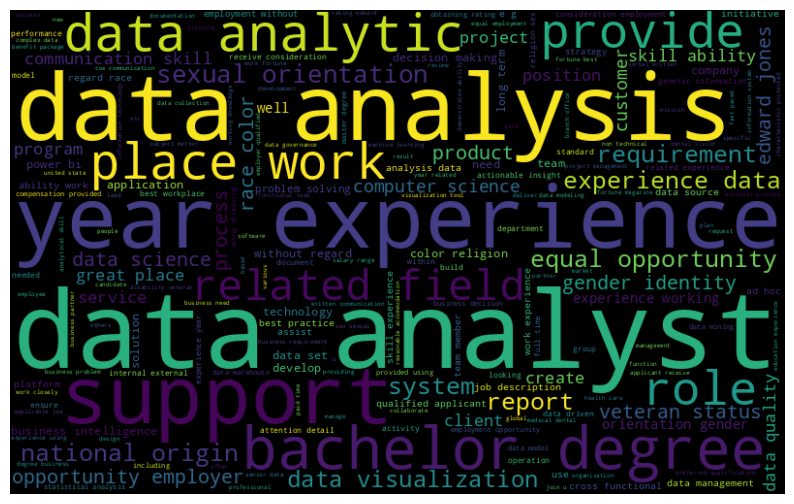

In [123]:
# plot word cloud of most frequent words
all_words = [word for tokens in df_prep["description_tokens_lemmatized"] for word in tokens]
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(all_words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

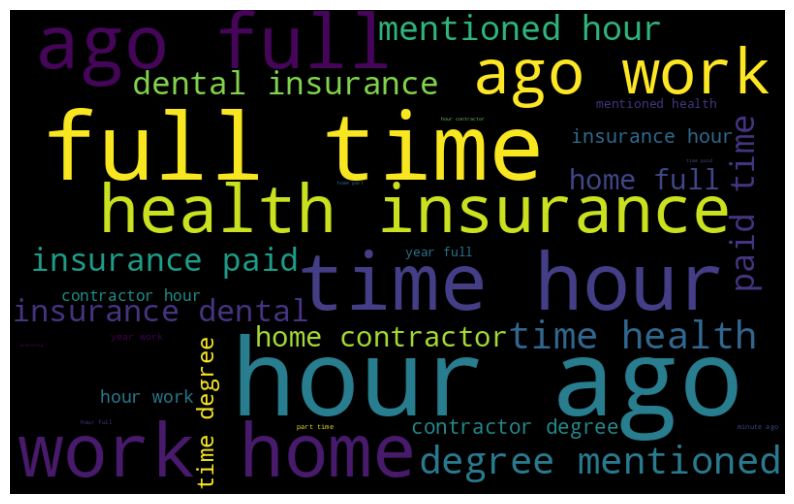

In [124]:
# plot word cloud of most frequent words
all_words = [word for tokens in df_prep["extensions_tokens_lemmatized"] for word in tokens]
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(all_words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

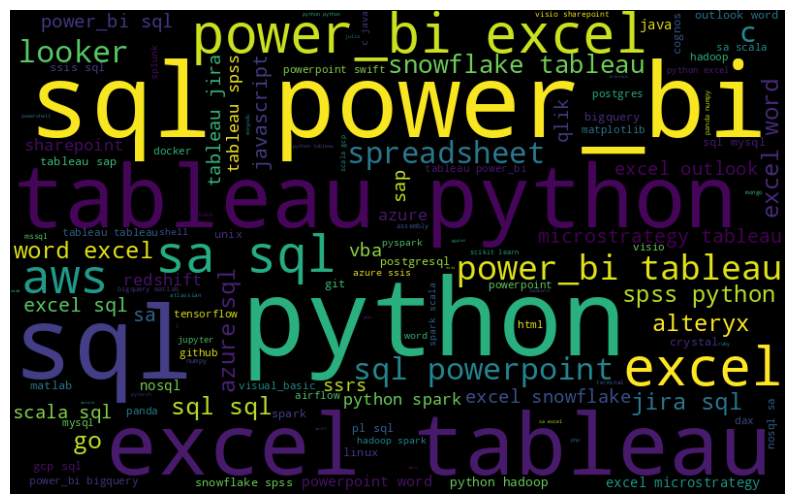

In [125]:
# plot word cloud of most frequent words
all_words = [word for tokens in df_prep["description_tokens_tokens_lemmatized"] for word in tokens]
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(all_words))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [126]:
df_prep.head()

description  \
5883   Migration of enterprise database to Oracle clo...   
190    Are you looking for a new job? Check out this ...   
442    Req ID: 408370\n• This position will be locate...   
13736  Role: Data Analyst With Claims\n\nLocation: 10...   
12514  Talentify helps candidates around the world to...   

                                              extensions  \
5883   ['6 hours ago', '20–50 an hour', 'Work from ho...   
190    ['19 hours ago', 'Full-time', 'No degree menti...   
442                        ['22 hours ago', 'Full-time']   
13736     ['9 hours ago', 'Work from home', 'Full-time']   
12514    ['15 hours ago', 'Work from home', 'Full-time']   

                                      description_tokens  \
5883   [migration, enterprise, database, oracle, clou...   
190    [looking, new, job, check, job, post, strategi...   
442    [req, id, position, located, oklahoma, city, o...   
13736  [role, data, analyst, claims, location, remote...   
12514  [talentify, helps, candidates, around, world, ...   

                                       description_clean  \
5883   migration of enterprise database to oracle clo...   
190    are you looking for a new job check out this j...   
442    req id this position will be located at our ok...   
13736  role data analyst with claims location remote ...   
12514  talentify helps candidates around the world to...   

                                        extensions_clean  \
5883   hours ago an hour work from home contractor no...   
190              hours ago full time no degree mentioned   
442                                  hours ago full time   
13736                 hours ago work from home full time   
12514                 hours ago work from home full time   

                                description_tokens_clean  \
5883                                                       
190                                                        
442                   excel snowflake tableau powerpoint   
13736  python alteryx gcp sql looker spreadsheet tableau   
12514                                             python   

                                       extensions_tokens  \
5883   [hours, ago, hour, work, home, contractor, deg...   
190          [hours, ago, full, time, degree, mentioned]   
442                             [hours, ago, full, time]   
13736               [hours, ago, work, home, full, time]   
12514               [hours, ago, work, home, full, time]   

                               description_tokens_tokens  \
5883                                                  []   
190                                                   []   
442              [excel, snowflake, tableau, powerpoint]   
13736  [python, alteryx, gcp, sql, looker, spreadshee...   
12514                                           [python]   

                           description_tokens_lemmatized  \
5883   [migration, enterprise, database, oracle, clou...   
190    [looking, new, job, check, job, post, strategi...   
442    [req, id, position, located, oklahoma, city, o...   
13736  [role, data, analyst, claim, location, remote,...   
12514  [talentify, help, candidate, around, world, di...   

                            extensions_tokens_lemmatized  \
5883   [hour, ago, hour, work, home, contractor, degr...   
190           [hour, ago, full, time, degree, mentioned]   
442                              [hour, ago, full, time]   
13736                [hour, ago, work, home, full, time]   
12514                [hour, ago, work, home, full, time]   

                    description_tokens_tokens_lemmatized  
5883                                                  []  
190                                                   []  
442              [excel, snowflake, tableau, powerpoint]  
13736  [python, alteryx, gcp, sql, looker, spreadshee...  
12514                                           [python]

In [127]:
# create word embeddings with TF-IDF
tfidf = TfidfVectorizer()
tfidf.fit(df_prep["description_clean"])
embeddings_description = tfidf.transform(df_prep["description_clean"]).toarray()

In [128]:
embeddings_description.shape

(2000, 15703)

In [129]:
tfidf.fit(df_prep["extensions_clean"])
embeddings_extensions = tfidf.transform(df_prep["extensions_clean"]).toarray()

In [130]:
tfidf.fit(df_prep["description_tokens_clean"])
embeddings_description_tokens = tfidf.transform(df_prep["description_tokens_clean"]).toarray()

In [131]:
import numpy as np
# concatenate embeddings
all_embeddings_v1 = np.concatenate([embeddings_description, embeddings_extensions], axis=1)

In [132]:
all_embeddings = np.concatenate([all_embeddings_v1, embeddings_description_tokens], axis=1)

In [133]:
all_embeddings.shape

(2000, 15828)

In [134]:
# train Word2Vec model
embedding_train = Word2Vec(df_prep["description_tokens"], min_count=1, size=20)

# Get the word embeddings for each words
embeddings = []
for word in embedding_train.wv.vocab:
    embeddings.append(embedding_train.wv[word])

# Create a dataframe with the embeddings
embeddings_df = pd.DataFrame(embeddings)

In [135]:
embeddings_df

0         1         2         3         4         5         6   \
0     -0.065187 -0.554681  0.696786 -0.836931 -0.201956  0.535565 -0.010868   
1     -3.102313  1.326775  3.770359 -0.788223 -1.312082  1.611321  1.042547   
2     -1.105730 -2.821155  4.167782 -1.670101  1.110684  1.056882  3.238631   
3      1.064867 -2.990126  1.955018  0.101440  0.184769  0.675272  2.178915   
4     -0.190236 -2.945582  2.338156  0.956774 -0.551593 -0.308796  1.387361   
...         ...       ...       ...       ...       ...       ...       ...   
15585  0.019647 -0.052603 -0.017070 -0.018160  0.009707  0.018470  0.019945   
15586  0.004508  0.021032  0.014248  0.006734 -0.050468  0.025142  0.019652   
15587 -0.021399 -0.023303  0.006277 -0.008980 -0.076612  0.000801  0.027136   
15588  0.010469 -0.012600  0.000570 -0.002572  0.029346 -0.037286 -0.005120   
15589  0.021063  0.038545 -0.032504  0.048076 -0.048602  0.040019 -0.020829   

             7         8         9         10        11        12        13  \
0      0.337231  0.349792 -0.406018 -0.508783 -0.149697 -0.244926  0.948545   
1     -0.791366  1.504987 -1.976852 -0.780016 -1.213932 -2.094638  0.892826   
2     -1.930283  1.373599 -2.430223 -1.703443  0.791673 -3.145391  3.367832   
3     -1.527154  0.918984 -2.605096 -1.436067 -0.034407 -1.479498  1.534544   
4     -3.586094  2.590127 -3.035326 -1.793644 -0.044393 -1.121664  1.213061   
...         ...       ...       ...       ...       ...       ...       ...   
15585  0.031133 -0.000205 -0.036942 -0.023803 -0.009693 -0.002962  0.082698   
15586  0.005851 -0.041928 -0.010712  0.027130  0.008143  0.006068 -0.013781   
15587  0.020478  0.000214 -0.000347 -0.011102 -0.033376 -0.001186 -0.005060   
15588  0.047041  0.003028  0.017611 -0.039089 -0.025481  0.011936  0.029193   
15589  0.000959 -0.031155  0.048319  0.014388 -0.001895  0.027812 -0.028854   

             14        15        16        17        18        19  
0     -0.560445 -0.476760  0.801480 -0.108846 -0.294056 -0.152912  
1      1.257325 -0.972851  2.317873 -1.482273 -1.120079 -0.445027  
2     -1.788936 -2.356138  0.870670  1.549879 -3.259096  0.377464  
3     -0.201709 -2.175344  0.339534  1.948275 -1.671753  0.168445  
4      1.801950 -2.741407  1.656867  0.760574 -1.115828 -0.600502  
...         ...       ...       ...       ...       ...       ...  
15585 -0.030242 -0.027038  0.068704  0.014539 -0.022129  0.007624  
15586  0.011104 -0.041983 -0.031118 -0.014304 -0.030630 -0.030711  
15587 -0.028744  0.022950 -0.015147  0.024186 -0.019757  0.004775  
15588  0.002860  0.018416 -0.005202  0.010359 -0.001580 -0.005485  
15589  0.022821 -0.007561 -0.015138  0.013628  0.015532  0.026270  

[15590 rows x 20 columns]

### Reduction de dimension

In [150]:
# perform t-SNE
tsne = TSNE(n_components=3, random_state=42)
embeddings_tsne = tsne.fit_transform(embeddings_df)

In [151]:
embeddings_tsne

array([[ 28.510204 ,  -1.2674329, -13.503069 ],
       [ 33.73188  ,  13.000228 , -19.341572 ],
       [ 36.323017 , -11.534273 , -10.798012 ],
       ...,
       [-36.231846 ,  -3.5758183,   5.2130637],
       [-33.54488  , -23.521063 , -11.159365 ],
       [-26.803234 , -33.37587  ,  -9.2403965]], dtype=float32)

### préparation du dataframe

In [199]:
lin.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'posted_at', 'schedule_type',
       'search_term', 'date_time', 'search_location', 'description_tokens'],
      dtype='object')

In [153]:
tsne_df = pd.DataFrame(embeddings_tsne, columns=['Component 1', 'Component 2', 'Component 3'])

In [154]:
# sns.lmplot(x='Component 1',
#            y='Component 2',
#            data=tsne_df,
#            fit_reg=False,
#            legend=True,
#            height=9,
# #            hue='Label',
#            scatter_kws={"s":200, "alpha":0.3})

# plt.title('t-SNE Results: Digits', weight='bold').set_fontsize(6)
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

In [155]:
trace = go.Scatter3d(
    x=tsne_df['Component 1'],
    y=tsne_df['Component 2'],
    z=tsne_df['Component 3'],
    mode='markers',
    marker=dict(
        size=5,
        colorscale='Viridis',
        opacity=0.8
    )
)

fig = go.Figure(data=[trace])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Conclusion du t-SNE : des components pas très explicable

### Clustering : 1st model : Agglomerative Clustering

In [182]:
model_AC = AgglomerativeClustering(n_clusters=3, metric = 'l2', linkage='complete')

labels = model_AC.fit_predict(tsne_df)

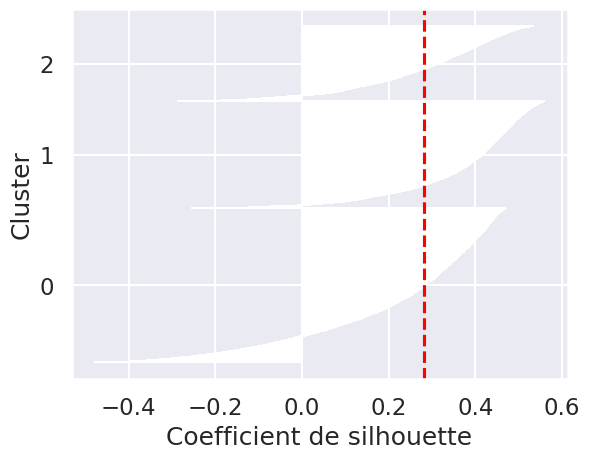

Silhouette Score : 0.28076988


In [183]:
# Calculer le coefficient de silhouette pour chaque point
silhouette_vals = silhouette_samples(tsne_df, labels)

# Calculer la silhouette moyenne pour le dataset
silhouette_avg = np.mean(silhouette_vals)

# Tracer le diagramme de silhouette
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    y_ticks.append((y_lower + y_upper) / 2.)
    y_lower += len(cluster_silhouette_vals)
sns.set_theme(context='talk', style='darkgrid', palette='deep', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(y_ticks, np.unique(labels))
plt.ylabel('Cluster')
plt.xlabel('Coefficient de silhouette')
plt.show()
print("Silhouette Score :",silhouette_avg)

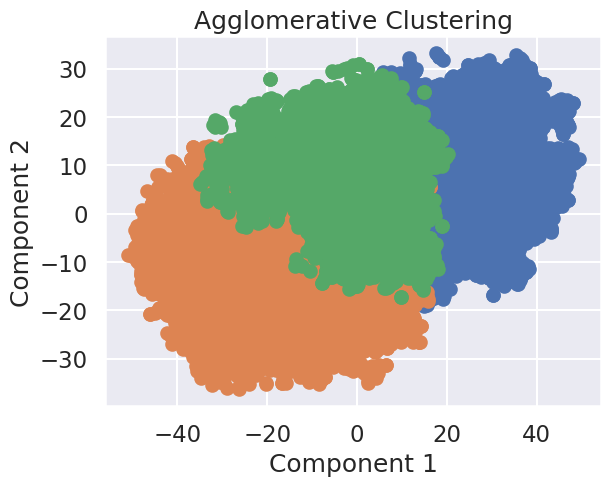

In [184]:
feat1 = 'Component 1'
feat2 = 'Component 2'


# Create a DataFrame with the two features and the cluster labels
df_1 = pd.DataFrame({'x': tsne_df[feat1], 'y': tsne_df[feat2], 'label': labels})

# Get a list of the unique cluster labels
clusters = df_1['label'].unique()

# Set up the plot
fig, ax = plt.subplots()

# Plot the data points for each cluster
for cluster in clusters:
    data = df_1[df_1['label'] == cluster]
    ax.scatter(data['x'], data['y'], label=f'Cluster {cluster}')

# Add legend and axis labels
# ax.legend(labels=["Promising","G.O.A.T"])
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_title('Agglomerative Clustering')

# Show the plot
plt.show()

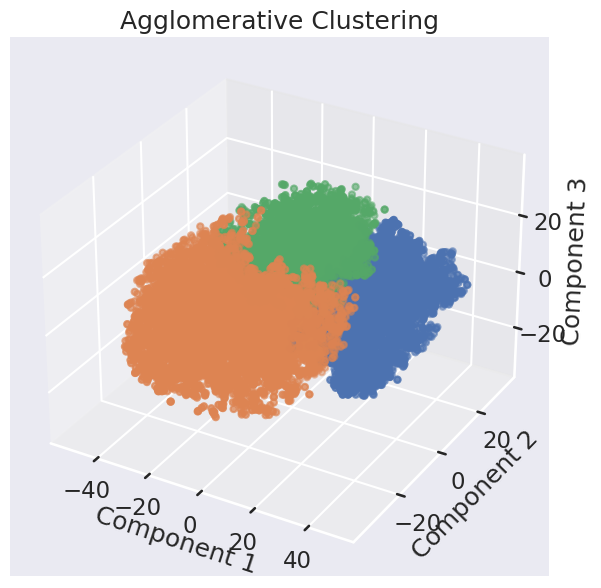

In [186]:
from mpl_toolkits import mplot3d

feat1 = 'Component 1'
feat2 = 'Component 2'
feat3 = 'Component 3'

# Create a DataFrame with the three features and the cluster labels
df_1 = pd.DataFrame({'x': tsne_df[feat1], 'y': tsne_df[feat2], 'z': tsne_df[feat3], 'label': labels})

# Get a list of the unique cluster labels
clusters = df_1['label'].unique()

# Set up the plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points for each cluster
for cluster in clusters:
    data = df_1[df_1['label'] == cluster]
    ax.scatter(data['x'], data['y'], data['z'], label=f'Cluster {cluster}')

# Add legend and axis labels
# ax.legend(labels=["Promising","G.O.A.T"])
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel(feat3)
ax.set_title('Agglomerative Clustering')

# Show the plot
plt.show()

In [187]:
# Create a DataFrame with the three features and the cluster labels
df_3d = pd.DataFrame({'x': tsne_df['Component 1'], 'y': tsne_df['Component 2'], 'z': tsne_df['Component 3'], 'label': labels})

# Create the plot
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='label')

# Show the plot
fig.show()

### 2nd model : KMeans Clustering

In [196]:
# Perform KMeans clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = model_kmeans.fit_predict(tsne_df)

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [197]:
# # Calculer le coefficient de silhouette pour chaque point
# silhouette_vals = silhouette_samples(tsne_df, labels_kmeans)

# # Calculer la silhouette moyenne pour le dataset
# silhouette_avg = np.mean(silhouette_vals)

# # Tracer le diagramme de silhouette
# y_ticks = []
# y_lower, y_upper = 0, 0
# for i, cluster in enumerate(np.unique(labels_kmeans)):
#     cluster_silhouette_vals = silhouette_vals[labels_kmeans == cluster]
#     cluster_silhouette_vals.sort()
#     y_upper += len(cluster_silhouette_vals)
#     plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
#     y_ticks.append((y_lower + y_upper) / 2.)
#     y_lower += len(cluster_silhouette_vals)
# sns.set_theme(context='talk', style='darkgrid', palette='deep', font='sans-serif', 
#                   font_scale=1, color_codes=True, rc=None)
# plt.axvline(silhouette_avg, color="red", linestyle="--")
# plt.yticks(y_ticks, np.unique(labels))
# plt.ylabel('Cluster')
# plt.xlabel('Coefficient de silhouette')
# plt.show()
# print("Silhouette Score :",silhouette_avg)

In [198]:
# Create a DataFrame with the three features and the cluster labels
df_3d = pd.DataFrame({'x': tsne_df['Component 1'], 'y': tsne_df['Component 2'], 'z': tsne_df['Component 3'], 'label': labels_kmeans})

# Create the plot
fig = px.scatter_3d(df_3d, x='x', y='y', z='z', color='label')

# Show the plot
fig.show()